In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import ast

### Debido a que [**Rapid**](https://rapidapi.com/search?term=idealista&sortBy=ByRelevance) y la API de [**Idealista**](https://www.idealista.com/) no tienen el mismo formato juntamos los dos dataframes 



In [2]:
df = pd.read_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/idealista_api.csv')

/tmp/ipykernel_29780/3237295245.py:1: DtypeWarning: Columns (45,46,47,48,49,50,51,54,57,59,60,61,62,63,64,66,67,68,69,70,72,76,77,78,79,80,81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('KSchool-Datascience/TFM/API/Idealista/Compra/idealista_meu.csv')


In [3]:
df.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,priceInfo,contactInfo,features,detailedType,suggestedTexts,isOnlineBookingActive,parkingSpace,multimedia,ribbons,labels
0,100638364,https://img4.idealista.com/blur/WEB_LISTING-M/...,AR183392,34,bj,675000.0,duplex,sale,262.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,99128480,https://img4.idealista.com/blur/WEB_LISTING-M/...,AA177438,34,2,770000.0,flat,sale,197.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,105835355,https://img4.idealista.com/blur/WEB_LISTING-M/...,MAD52827,32,3,795000.0,flat,sale,155.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93214596,https://img4.idealista.com/blur/WEB_LISTING-M/...,NA159492,32,3,430000.0,duplex,sale,150.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98352583,https://img4.idealista.com/blur/WEB_LISTING-M/...,MH174175,41,NaN,1395000.0,chalet,sale,368.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'locationId', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'hasVideo', 'status',
       'newDevelopment', 'favourite', 'newProperty', 'hasLift', 'priceByArea',
       'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'urgentVisualHighlight',
       'visualHighlight', 'preferenceHighlight', 'topHighlight',
       'topNewDevelopment', 'topPlus', 'priceDropValue', 'dropDate',
       'priceDropPercentage', 'newDevelopmentFinished', 'highlightComment',
       'commercialName', 'contactName', 'userType', 'agencyLogo',
       'contactMethod', 'micrositeShortName', 'totalAds', 'phone1.phoneNumber',
       'phone1.formattedPhone', 'phone1.prefix',
       'phone1.phoneNumberForMobileDialing', 'phone1.nationalNumber',
   

In [6]:
columna = 'totalAds'


primer_nan = df[columna].isna().idxmax() if df[columna].isna().any() else None

if primer_nan is not None:
    print(f"El primer NaN en la columna '{columna}' está en el índice: {primer_nan}")
else:
    print(f"No hay valores NaN en la columna '{columna}'.")

El primer NaN en la columna 'totalAds' está en el índice: 9384


In [7]:
df_down = df.loc[:9383]
df_up_9384 = df.loc[9383:]

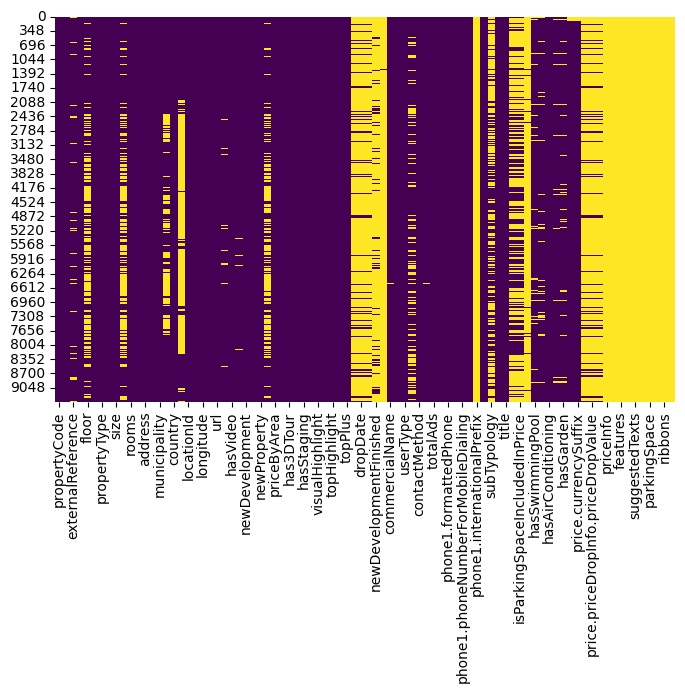

In [8]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_down.isna(), cmap='viridis', cbar=False)
plt.show()

In [9]:
import pandas as pd
import ast


def parse_dict(x):
    if x is None:  
        return {}
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)  
        except (ValueError, SyntaxError):
            return {}  
    elif not isinstance(x, dict):  
        return {} 
    return x


columnas_a_expandir = [
    'priceInfo', 'contactInfo', 'features', 'detailedType', 
    'suggestedTexts', 'parkingSpace', 'multimedia'
]


for columna in columnas_a_expandir:
    if columna in df_up_9384.columns:

        df_up_9384[columna] = df_up_9384[columna].apply(parse_dict)
        
        expanded_df_up_9384 = pd.json_normalize(df_up_9384[columna])
        
        if expanded_df_up_9384.empty:
            print(f"Warning: '{columna}' has no valid dictionary entries.")
        
        expanded_df_up_9384.reset_index(drop=True, inplace=True)
        df_up_9384.reset_index(drop=True, inplace=True)
        

        for subcolumna in expanded_df_up_9384.columns:
            df_up_9384[subcolumna] = expanded_df_up_9384[subcolumna]
        

        df_up_9384 = df_up_9384.drop(columns=[columna])


print(df_up_9384)


/tmp/ipykernel_29780/2092343847.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up_9384[columna] = df_up_9384[columna].apply(parse_dict)
/tmp/ipykernel_29780/2092343847.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up_9384[subcolumna] = expanded_df_up_9384[subcolumna]


       propertyCode                                          thumbnail  \
0         105836324  https://img4.idealista.com/blur/WEB_LISTING-M/...   
1          96079295  https://img4.idealista.com/blur/WEB_LISTING-M/...   
2          37770085  https://img4.idealista.com/blur/WEB_LISTING-M/...   
3          37846454  https://img4.idealista.com/blur/WEB_LISTING-M/...   
4          97300705  https://img4.idealista.com/blur/WEB_LISTING-M/...   
...             ...                                                ...   
11114     105991360  https://img4.idealista.com/blur/WEB_LISTING-M/...   
11115     104332999  https://img4.idealista.com/blur/WEB_LISTING-M/...   
11116     105931049  https://img4.idealista.com/blur/WEB_LISTING-M/...   
11117     105835674  https://img4.idealista.com/blur/WEB_LISTING-M/...   
11118     105361604  https://img4.idealista.com/blur/WEB_LISTING-M/...   

      externalReference  numPhotos floor     price propertyType operation  \
0                   NaN         19

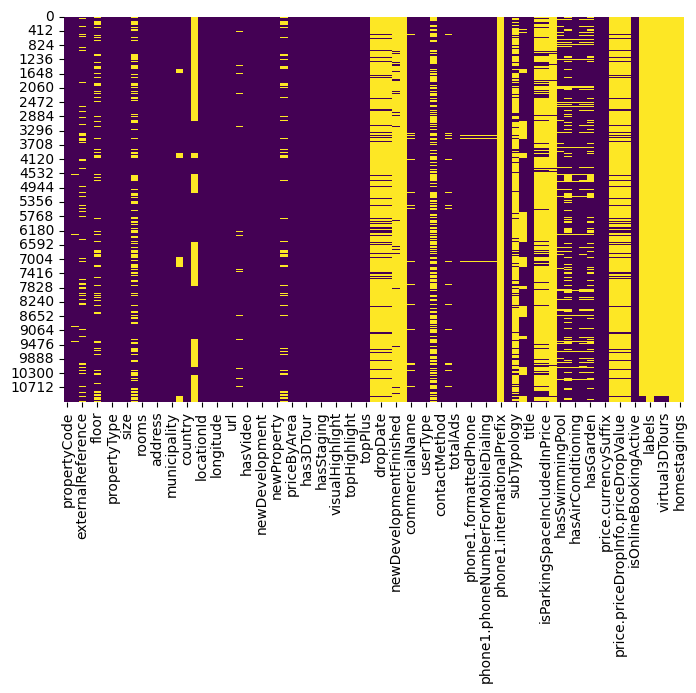

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_up_9384.isna(), cmap='viridis', cbar=False)
plt.show()

In [11]:
df_up_9384 = df_up_9384.dropna(axis=1, how= 'all')

In [12]:
df_2 =  pd.concat([df_up_9384, df_down], ignore_index=True)

In [13]:
df_up_9384['price']

0        217700.0
1        570000.0
2        570000.0
3        570000.0
4        570000.0
           ...   
11114    269000.0
11115    275000.0
11116    295000.0
11117    360000.0
11118    440500.0
Name: price, Length: 11119, dtype: float64

In [14]:
df_2.columns

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'locationId', 'latitude', 'longitude',
       'showAddress', 'url', 'description', 'hasVideo', 'status',
       'newDevelopment', 'favourite', 'newProperty', 'hasLift', 'priceByArea',
       'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'urgentVisualHighlight',
       'visualHighlight', 'preferenceHighlight', 'topHighlight',
       'topNewDevelopment', 'topPlus', 'priceDropValue', 'dropDate',
       'priceDropPercentage', 'newDevelopmentFinished', 'highlightComment',
       'commercialName', 'contactName', 'userType', 'agencyLogo',
       'contactMethod', 'micrositeShortName', 'totalAds', 'phone1.phoneNumber',
       'phone1.formattedPhone', 'phone1.prefix',
       'phone1.phoneNumberForMobileDialing', 'phone1.nationalNumber',
   

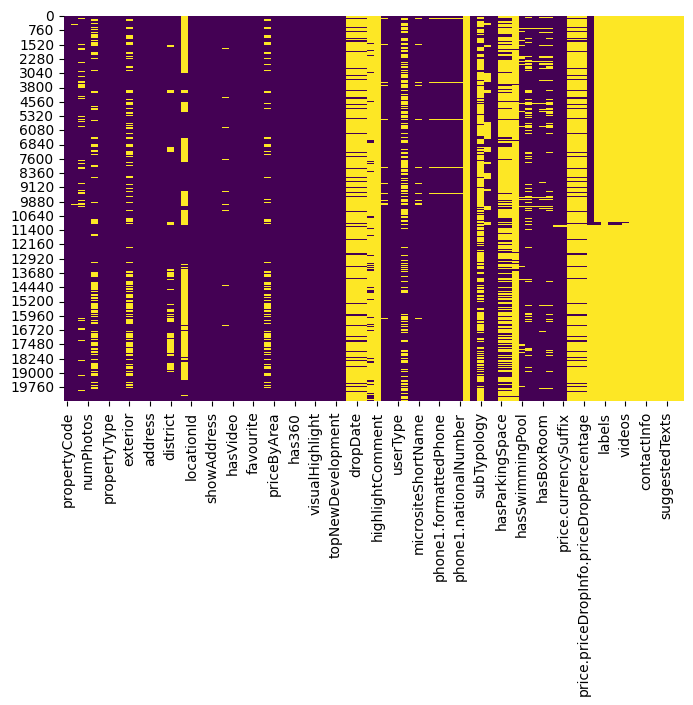

In [15]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_2.isna(), cmap='viridis', cbar=False)
plt.show()

In [16]:
df_2 = df_2.dropna(axis=1, how= 'all')

In [18]:
import pandas as pd
import ast

def parse_dict(x):
    if x is None:  
        return {}
    if isinstance(x, str):
        try:
            
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            
            return x
    elif isinstance(x, dict):  
        return x

    return x

for columna in df_2.columns:

    df_2[columna] = df_2[columna].apply(parse_dict)
    
    if df_2[columna].apply(lambda x: isinstance(x, dict)).any():
        expanded_df = pd.json_normalize(df_2[columna])
        
        if expanded_df.empty:
            print(f"Warning: '{columna}' has no valid dictionary entries.")
        
        expanded_df.reset_index(drop=True, inplace=True)
        df_2.reset_index(drop=True, inplace=True)
        

        for subcolumna in expanded_df.columns:
            df_2[subcolumna] = expanded_df[subcolumna]
        

        df_2 = df_2.drop(columns=[columna])


print(df_2)


<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal


       propertyCode                                          thumbnail  \
0         105836324  https://img4.idealista.com/blur/WEB_LISTING-M/...   
1          96079295  https://img4.idealista.com/blur/WEB_LISTING-M/...   
2          37770085  https://img4.idealista.com/blur/WEB_LISTING-M/...   
3          37846454  https://img4.idealista.com/blur/WEB_LISTING-M/...   
4          97300705  https://img4.idealista.com/blur/WEB_LISTING-M/...   
...             ...                                                ...   
20498     105795332  https://img4.idealista.com/blur/WEB_LISTING-M/...   
20499     104801657  https://img4.idealista.com/blur/WEB_LISTING-M/...   
20500      88629910  https://img4.idealista.com/blur/WEB_LISTING-M/...   
20501     105339676  https://img4.idealista.com/blur/WEB_LISTING-M/...   
20502     105836324  https://img4.idealista.com/blur/WEB_LISTING-M/...   

      externalReference  numPhotos floor     price propertyType operation  \
0                   NaN         19

In [20]:
df_2.to_csv('/TFM Mercado Inmobiliario - Kschool/Metodología de Modelado/9. Código y datasets/Barcelona/Datasets/barcelona_api_junto.csv', sep = ";", index = False)